# Logistic Regression Implementation.
In this homework, you will be implementing Logistic Regression on a binary classification task. All your responses must be saved in a jupyter notebook and pushed to your git repository. Please upload a .txt file with a link to your file as your submission on Submitty.

## Task 1 (10 points):
Describe a machine learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic regression is the best choice for solving this problem.

A machine learning problem that aligns well with logistic regression is "diabetes prediction" Given the extensive diabetes database in the United States, logistic regression emerges as a fitting choice for this task. Diabetes prediction inherently falls into the realm of binary classification, aiming to ascertain whether an individual is diabetic or not.

1. **Binary Classification Problem:**
   Logistic Regression is well-suited for binary classification tasks, where the outcome variable has two possible classes. In the case of diabetes prediction, the classes are often "diabetic" and "non-diabetic," making Logistic Regression a natural fit.

2. **Probabilistic Interpretation:**
   Logistic Regression provides probabilities for the predicted outcomes. This is beneficial in medical diagnosis scenarios like diabetes prediction, where knowing the probability of an individual having diabetes can be crucial for making informed decisions.

3. **Linear Decision Boundary:**
   Logistic Regression models assume a linear decision boundary. While this may seem like a limitation, it can work well for problems where the classes are separable by a hyperplane, as is often the case in medical datasets.

4. **Interpretability:**
   Logistic Regression models are relatively simple and offer good interpretability. The coefficients of the model can provide insights into the influence of each feature on the likelihood of having diabetes.

5. **Efficiency:**
   Logistic Regression is computationally efficient and can handle a large number of features. This is important in healthcare datasets, which may include numerous patient characteristics that contribute to the prediction.

## Task 2 (20 points):
Pick a publicly available dataset (except The Titanic Dataset) that you will use to solve this problem. You must provide a link to the dataset and perform the necessary Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a justification of why these were required. For example, if the dataset has lot of missing values, then why did you use a specific technique when handling missing data. This task may include data visualization (Check this link : https://www.geeksforgeeks.org/top-8-python-libraries-for-data-visualization/ ).


[Link to Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

In [11]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import torch

In [12]:
df = pd.read_csv('data.csv')

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


The data does look organized and in a codition to be parsed. Next, I will check for missing values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

No missing values were found in the dataset. We can proceed with the EDA. But first I have to convert some col to a numeric value.

In [15]:
# Convert gender to binary (male = 0, female = 1)
gender_mapping = {'Male': 0, 'Female': 1}

df['gender'] = df['gender'].map(gender_mapping)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0


In [16]:
smoking_mapping = {'never': 0, 'current': 1, 'No Info': 0.5}

df['smoking_history'] = df['smoking_history'].map(smoking_mapping)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,0.0,25.19,6.6,140,0
1,1.0,54.0,0,0,0.5,27.32,6.6,80,0
2,0.0,28.0,0,0,0.0,27.32,5.7,158,0
3,1.0,36.0,0,0,1.0,23.45,5.0,155,0
4,0.0,76.0,1,1,1.0,20.14,4.8,155,0


In [17]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,100000.000000,100000.00000,100000.000000,80197.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585625,41.885856,0.07485,0.039420,0.33909,27.320767,5.527507,138.058060,0.085000
std,0.492616,22.516840,0.26315,0.194593,0.33535,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.00000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.00000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,0.50000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,0.50000,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.00000,1.000000,1.00000,95.690000,9.000000,300.000000,1.000000


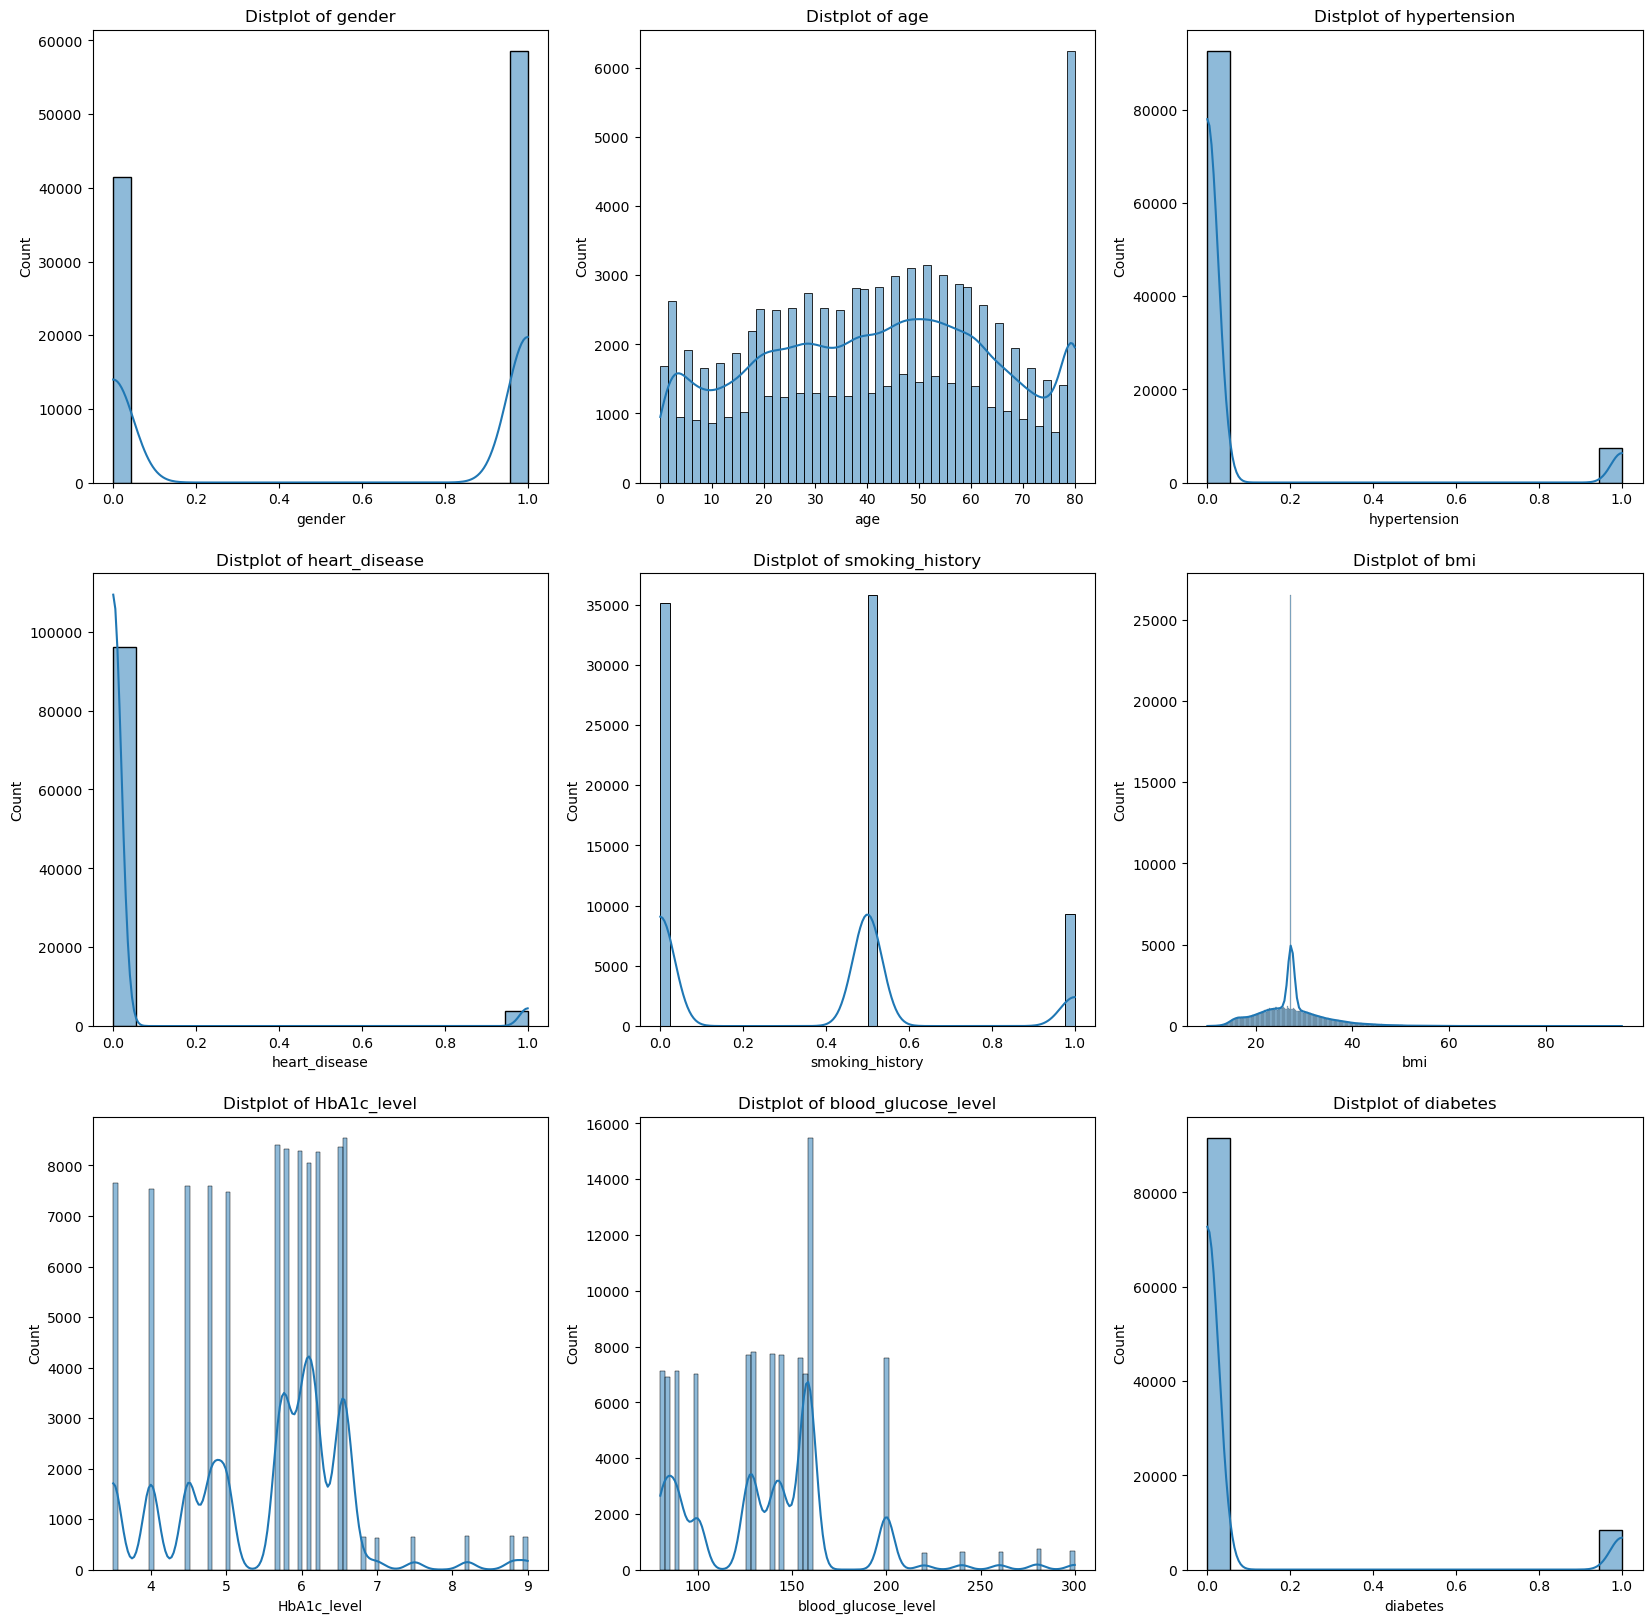

In [18]:
# Plotting the data for each feature
fig, axs=plt.subplots(nrows=3,ncols=3,figsize=(20,20))
axs = axs.flatten()
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axs[i])
    axs[i].set_title(f'Distplot of {column}')


The distribution of the gender looks to be even and the ages are not skewed to one end.


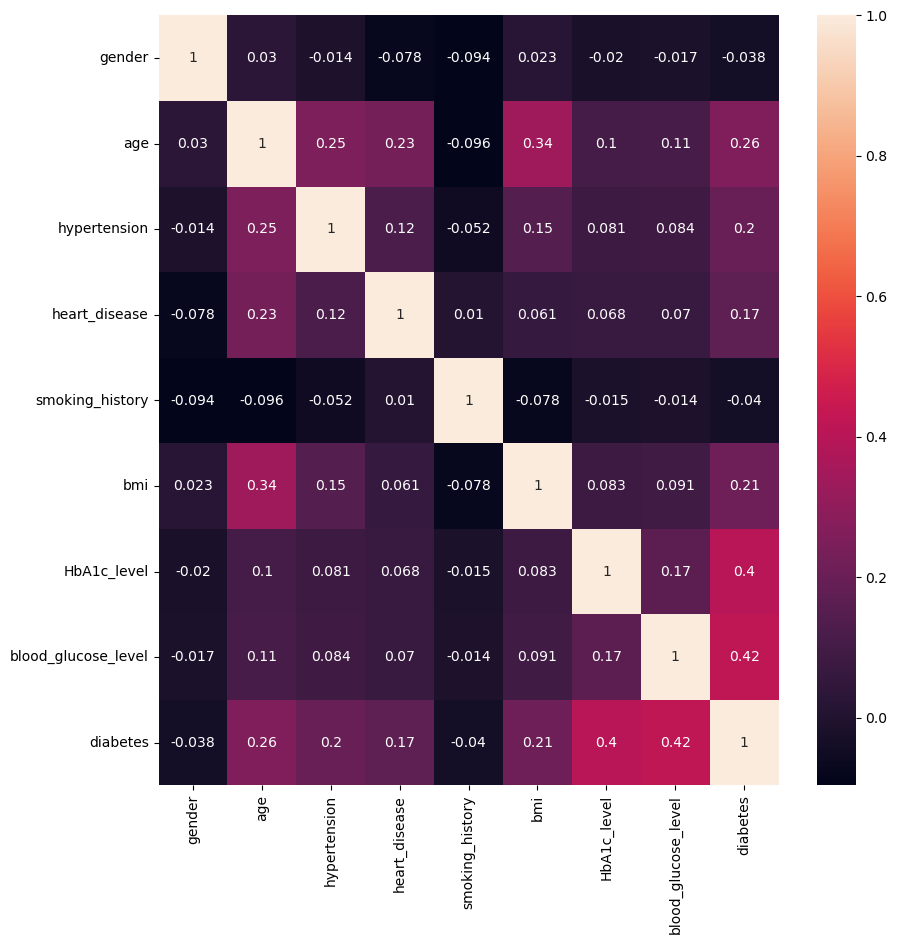

In [19]:
corr = df.corr()
sns.heatmap(corr, annot=True, ax=plt.subplots(figsize=(10,10))[1])
plt.show()

### Examination
> A hashmap was created to find the correlation between certain features. There is two correlations with diabetes standing out. The first one is the HbA1c_level which is a measure of the average blood sugar level over the past 3 months. The second one is the blood_glucose_level which is a measure of the amount of glucose in the blood. Both of these are expected to be correlated with diabetes.
### Analysis
> The data appears to be collected and organized in an appropriate manner. It's a homogeneous collection with a balanced age selection, mostly between 20 to 60, with an mean age of 41.8. The number of data points is more than sufficient, with 100,000 samples collected and processed. Overall, this is a valid source to use.

## Task 3 (25 points):
Implement, Logistic Regression in this step. Clearly write your cost function and derivatives before implementing gradient descent. Do not use any built-in packages for this step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants of gradient descent in their original form. (Refer to the research paper discussed in class).


In [20]:
# Convert dataframe to numpy array
array = df.to_numpy()
array

array([[  1. ,  80. ,   0. , ...,   6.6, 140. ,   0. ],
       [  1. ,  54. ,   0. , ...,   6.6,  80. ,   0. ],
       [  0. ,  28. ,   0. , ...,   5.7, 158. ,   0. ],
       ...,
       [  0. ,  66. ,   0. , ...,   5.7, 155. ,   0. ],
       [  1. ,  24. ,   0. , ...,   4. , 100. ,   0. ],
       [  1. ,  57. ,   0. , ...,   6.6,  90. ,   0. ]])

## Task 4 (45 points):
Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’ gradient descent. Implement both. You may implement these algorithms yourself OR use a package. In your conclusion, compare both optimization techniques/algorithms with respect to the results you achieve. Also compare these results with the original implementation of gradient descent (Task 3 above). Describe why we should or why we should not use optimization algorithms for the task at hand. For comparison of these algorithms define an evaluation metric appropriate for your problem. (For more on evaluation metrics check this link: https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html )